# Titanic Survival Prediction using **Python**

Titanic Survival Prediction data set, the main task is to predict whether the passenger will survive or not. The survived column has two values where 0 indicates Not Survived, and 1 indicates Survived.

I shall go step by step with the first step been downloading the data, loading the data, and basic libraries . Moving forward with data exploration, data wrangling(cleaning) , data visualization, training our data and finally making predictions , finding out the accuracy of the model.

The details of the data set can be understood as we look into it step by step. So, let’s get started.

To download the data : just type on google download titanic data set csv, you can download it from Kaggle https://www.kaggle.com/c/titanic/data. Download the 3 files in case you are participating in the ongoing competition; and if you are just here for practice then we can stick with train.csv file (one of the data files)

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [107]:
titanic = pd.read_csv("train.csv")

In [108]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
titanic.shape

(891, 12)

## **DATA ANALYSIS AND VISUALIZATION**
For further exploring the data, let us visually represent the data in order to get a better idea. Seaborn, Matplotlib data visualization libraries in Python are used in this Machine Learning Project.

## **Analysing Data**

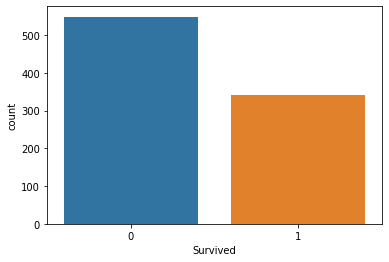

In [110]:
sns.countplot(x="Survived",data=titanic)

### Those who did not survived (More Than 500) are greater than who are not  survived(Nearly 300).

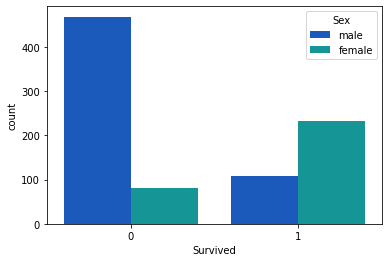

In [111]:
sns.countplot(x='Survived', hue='Sex' ,data=titanic, palette='winter')

# Analysis:-                                                                     

*   0 represents not survived and 1 Represent Survived
*   Womans are thrice more likely to survive than males.

  


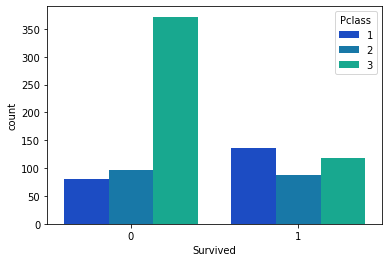

In [112]:
sns.countplot(x='Survived', hue='Pclass' ,data=titanic, palette='winter')

# Analysis:-                                                                     

*    Passangers who did not survived belong to 3rd Class.
*    1st class passangers are more likely to survive


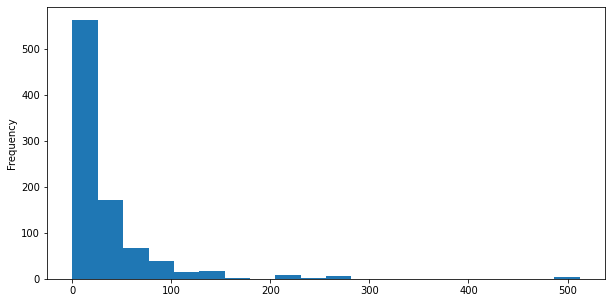

In [113]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))

We Observe that most of the tickets bought are under fare 100.





Very few are of higher side of fare 200-500 range

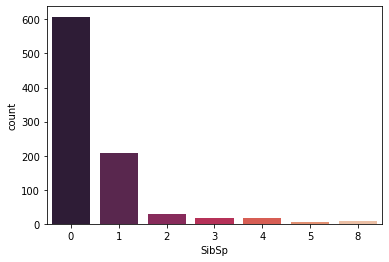

In [114]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

We  noticed most of them do not have Siblings abroad

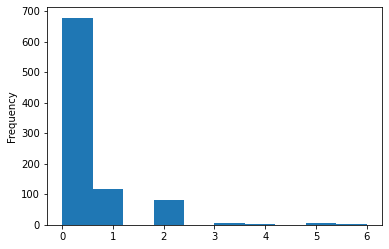

In [115]:
  titanic['Parch'].plot.hist()

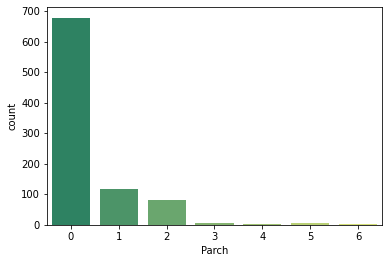

In [116]:
sns.countplot(x='Parch', data=titanic, palette='summer')

number Of Parents & Siblings who abroad are less

# Data Wrangling (Cleaning Data)

In [117]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, cabin , Embarked have most null values

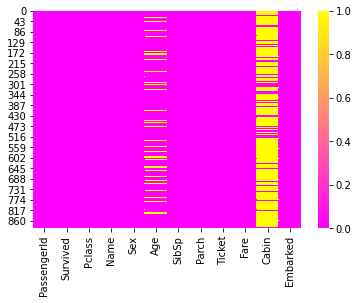

In [118]:
sns.heatmap(titanic.isnull(), cmap='spring')

Yellow is null valued,Highest value in Age
 

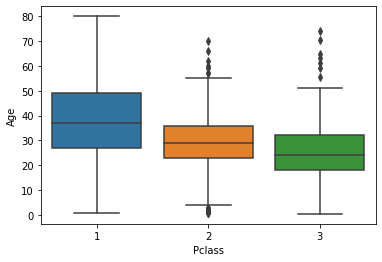

In [119]:
sns.boxplot(x='Pclass', y='Age',data=titanic)

We can Observe that older age group more in class 1 and 2 than class 3 

# **Dropping Columns**
Drop the less significant columns in this case Cabin. the Cabin column is not conveying much information as insights can be gathered from other columns like PClass, Embarked etc. Hence, i dropped the Cabin Column. Also, check for any null values, if present we drop all the null values using dropna() function in Python.

In [120]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
titanic.drop('Cabin', axis=1,inplace=True)

In [122]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [123]:
titanic.dropna(inplace=True)

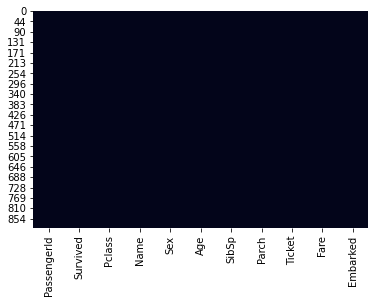

In [124]:
sns.heatmap(titanic.isnull(),cbar=False)

This Shows their is no nul values

In [125]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Model Building Process**
Prepare the model before it is given as an input to the Machine Leaning(ML) Algorithm. The ML Algorithms do not understand categorical or any other data, which are not numbers, Hence, I will convert the columns with categorical data(Sex, PClass, Embarked) into numeric using One Hot Encoding.

**ONE HOT ENCODING**
One-Hot Encoding simply creates one column for every possible value and put a 1 in the appropriate column. 

I will convert a few columns into categorical data to perform Logistic Regression, as Logistic Regression takes categorical /binary values. get_dummies() function is used to Convert categorical variable into dummy/indicator variables. For more information visit the Pandas documnetation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html



In [126]:
pd.get_dummies(titanic['Sex']).head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [127]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)

In [128]:
sex.head(3)

,male
0,1
1,0
2,0


We Drop One Column , becuse one is sufficient to determine
gender of pessanger either will be male(1) or Female(0)

In [129]:
Embark=pd.get_dummies(titanic['Embarked'])

In [130]:
Embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


C stands For Cherbourg, Q stands for Queenstown,S for Southhampton.
We can drop any one of the columns as we can infer from 2 column itself


In [131]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [132]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [133]:
Pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)

In [134]:
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


Our Data is Now convering to categorial data


In [135]:
 titanic=pd.concat([titanic,sex,embark,Pcl],axis=1)

In [136]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


Deleting Columns

In [137]:
titanic.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [138]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Training the Model
To train the model, first perform the train, test split and then Logistic Regression Algorithm is applied on to the data.

In [139]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=4)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
lm=LogisticRegression()

In [144]:
lm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Note : You can change the random state to get different result.

In [145]:
prediction=lm.predict(X_test)

In [146]:
from sklearn.metrics import classification_report

In [147]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84       145\n           1       0.77      0.67      0.71        90\n\n    accuracy                           0.80       235\n   macro avg       0.79      0.77      0.78       235\nweighted avg       0.79      0.80      0.79       235\n'

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
confusion_matrix(y_test,prediction)

array([[127,  18],
       [ 30,  60]])

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,prediction)

0.7957446808510639

We have 79% Accuracy which is quite good and the model can predict the data accuracy accurately

# Concluding Remarks
I notice here that accuracy score is close to 80% which makes our model a good model to predict the values accurately , here in Titanic data set our model accurately predicts as to who will survive and who will not survive.

Through Visualization we found out that females have more chances of survival than males, class 1 have more changes of survival, youth age group 20-35 yrs male from class 3 have not survived.


Further, other Machine Learning Algorithms can be applied on the same data set, Ensemble algorithms to boost the performance of the model and get good predictions